<a href="https://colab.research.google.com/github/rixprakash/DS2002F24/blob/main/nuf7jw_accbasketballhw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
! git clone https://github.com/rixprakash/DS2002F24

fatal: destination path 'DS2002F24' already exists and is not an empty directory.


In [12]:
import pandas as pd
df = pd.read_csv('/content/DS2002F24/homework/acc_players-2324F.csv')
#need to make the first row the column headers
df.columns = df.iloc[0]
df = df[1:] #getting rid of the column header row as data
df.reset_index(drop=True, inplace=True)
df.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


In [13]:
#total points scored by all players
total_points = df['PTS'].sum()
print(f'Total points scored by all players: {total_points}')

#player who played the most minutes
most_minutes_player = df.loc[df['MP'].idxmax()]
print(f'Player with most minutes: {most_minutes_player["Player"]} with {most_minutes_player["MP"]} minutes')

#top 5 players with total rebounds
df['TRB'] = pd.to_numeric(df['TRB']) #change to be all numerical
top_rebounders = df.nlargest(5, 'TRB')
print('Top 5 players in total rebounds:')
print(top_rebounders[['Player', 'TRB']])

Total points scored by all players: 34216432165389548623841915798211970305111552957727126794714564604470118384152039616623830726339278429425322156039182276112156591472071777714823628554544125219363140250659171047859326184834609677336616463834136245101534024926103072404399304464340245820394156731629223386005142368405542332925211545137602382564552510903590292811260772341548528333135408155263795952195533547531326963748917141168434144361306365336000225442608752283458159310811810024024714351466123571969717015651154810040877
Player with most minutes: Ian Schieffelin with 989 minutes
Top 5 players in total rebounds:
0             Player  TRB
5      Armando Bacot  380
178  Ian Schieffelin  340
90   Harrison Ingram  327
44    Mohamed Diarra  311
149    Norchad Omier  309


In [17]:
#dataFrame with players who played more than 500 minutes
df['MP'] = pd.to_numeric(df['MP']) #change to be all numerical
df['AST'] = pd.to_numeric(df['AST']) #change to be all numerical
df['BLK'] = pd.to_numeric(df['BLK']) #change to be all numerical
filtered_players = df[df['MP'] > 500]

#player with the highest total assists who played more than 500 minutes
highest_assists_player = filtered_players.loc[filtered_players['AST'].idxmax()]
print(f'Player with highest assists: {highest_assists_player["Player"]} with {highest_assists_player["AST"]} assists')

#top 3 assist leaders
top_assist_leaders = df.nlargest(3, 'AST')
print('Top 3 Assist Leaders in the League:')
print(top_assist_leaders[['Player', 'AST']])

#top 3 shot blockers
top_blockers = df.nlargest(3, 'BLK')
print('Top 3 Shot Blockers:')
print(top_blockers[['Player', 'BLK']])

Player with highest assists: Reece Beekman with 212 assists
Top 3 Assist Leaders in the League:
0            Player  AST
7     Reece Beekman  212
215  Jaeden Zackery  152
21    Elliot Cadeau  150
Top 3 Shot Blockers:
0           Player  BLK
51       Ryan Dunn   77
157   Quinten Post   61
5    Armando Bacot   56


In [19]:
#total points scored by each school
df['PTS'] = pd.to_numeric(df['PTS']) #change to be all numerical
points_by_school = df.groupby('School')['PTS'].sum().reset_index()

#total assists by each school
df['AST'] = pd.to_numeric(df['AST']) #change to be all numerical
assists_by_school = df.groupby('School')['AST'].sum().reset_index()

#top 3 total points scored by teams
top_schools = points_by_school.nlargest(3, 'PTS')
print('Top 3 schools by total points scored:')
print(top_schools)

Top 3 schools by total points scored:
           School   PTS
7        NC State  3101
8  North Carolina  3032
2            Duke  2830


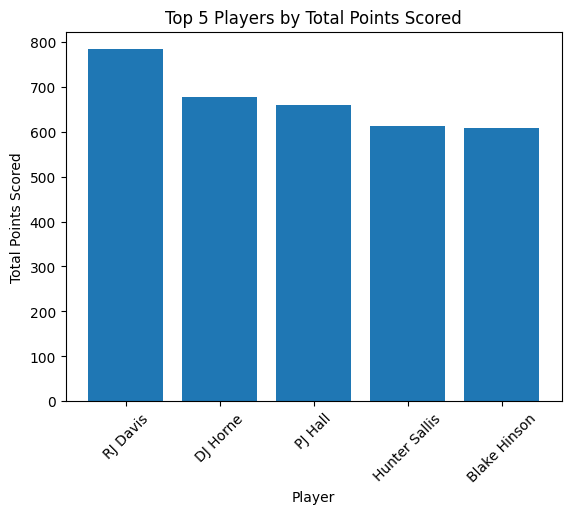

Correlation between FG% and WS: 0.4210663894199787


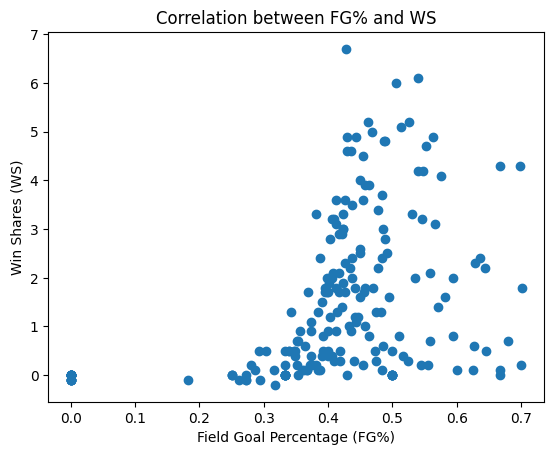

In [21]:
import matplotlib.pyplot as plt

#top 5 players by total points scored
df['PTS'] = pd.to_numeric(df['PTS']) #change to be all numerical
top_scorers = df.nlargest(5, 'PTS')
plt.bar(top_scorers['Player'], top_scorers['PTS'])
plt.xlabel('Player')
plt.ylabel('Total Points Scored')
plt.title('Top 5 Players by Total Points Scored')
plt.xticks(rotation=45)
plt.show()

#correlation between FG% and WS
df['FG%'] = pd.to_numeric(df['FG%']) #change to be all numerical
df['WS'] = pd.to_numeric(df['WS']) #change to be all numerical
correlation = df['FG%'].corr(df['WS'])
print(f'Correlation between FG% and WS: {correlation}')
plt.scatter(df['FG%'], df['WS'])
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.title('Correlation between FG% and WS')
plt.show()


**What did you learn about working with CSV files and pandas DataFrames in this assignment?**

Through this assignment, I gained a deeper understanding of handling csv files, grouping, and filtering data. First, I learned how to read data and how to identify needed changes before doing data manipulation. For example, I learned how to clean data without headers by setting the appropriate headers to ensure the dataframes was properly structured. I executed on data filtering and manipulation, focusing on specific columns and subdata values such as players with more than 500 minutes played and grouping by teams. I also became aware of how to group data by categories, like schools or those who have specific metrics. These skills are will allow me to execute data analysis work by educating me on the right strategy to transform raw data into storytelling.

**What was the most challenging aspect of this assignment, and how did you overcome it?**

One of the most challenging parts of this assignment was understanding the types and the structure of the data. I struggled at first with my code not working when I tried to interpret statistical columns and their importance, but then I realized the type wasn't integers and I had to manipualte the data to do so. My way other approaches of understanding the dataset was to use the head() function to see what the data looks like and if the values were good to go. This process and assignment improved my data reading skills and thinking for further data interpretation.

**How do you think the insights gained from analyzing ACC basketball statistics could be applied to other real-world datasets?**

The techniques used and insights gained from analyzing ACC basketball statistics can be applied to various real world datasets. Similar methods are used in play performance in the professional leagues, as well as with game outcomes or with sales and marketing like with the Warriors case study. If we look at the finance industry, data analysis can identify trends in sales, customer trends, and help drive decision making. In another industry like medicals, this analysis can be like patient data analysis to understand treatment outcomes and efficiencies. This assignment has helped me with understanding how to create data insights which can be applicable in all industries.
